# Word Importance in Regression Tree

This code is main edited by Yicen_Liu

Attention
Please put four .csv file in data folder and put this code in main folder instead of code folder.

This code want to provide you some important word list by linear regression method and tree regression method. 


In [2]:
library(dplyr)
library(tidytext)
library(tm)
library(stringr)
library(xgboost)
library(readr)
library(stringr)
library(caret)


In [3]:
reviews=read.csv("data/pizza_review2.csv")[,-c(1,11:14)]
reviews$text=as.character(reviews$text)
reviews=reviews[-which(reviews$text==""),]

In [4]:
yelp_text_tbl <- tbl_df(data.frame(uniqueID = 1:20000,reviews[1:20000,]))
yelp_text_tbl_words <- yelp_text_tbl %>% select(uniqueID,text) %>%
  unnest_tokens(word, text) %>% filter(str_detect(word,"^[a-z']+$")) %>%
  group_by(uniqueID) %>% count(word) 
ReviewWordMatrix <- yelp_text_tbl_words %>% cast_dtm(uniqueID, word, n)
R1=as.matrix(ReviewWordMatrix)
dim(R1)
ss1=apply(R1,2,sum)
R1=R1[,-which(ss1<20)]
dim(R1)


Warning message:
“`tbl_df()` is deprecated as of dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


[1] 20000 26167

[1] 20000  4160

In [5]:
yelp_text_tbl <- tbl_df(data.frame(uniqueID = 20001:40000,reviews[20001:40000,]))
yelp_text_tbl_words <- yelp_text_tbl %>% select(uniqueID,text) %>%
  unnest_tokens(word, text) %>% filter(str_detect(word,"^[a-z']+$")) %>%
  group_by(uniqueID) %>% count(word) 
ReviewWordMatrix <- yelp_text_tbl_words %>% cast_dtm(uniqueID, word, n)
R2=as.matrix(ReviewWordMatrix)
dim(R2)
ss2=apply(R2,2,sum)
R2=R2[,-which(ss2<20)]
dim(R2)

[1] 20000 25756

[1] 20000  4106

In [6]:
yelp_text_tbl <- tbl_df(data.frame(uniqueID = 40001:67152,reviews[40001:67152,]))
yelp_text_tbl_words <- yelp_text_tbl %>% select(uniqueID,text) %>%
  unnest_tokens(word, text) %>% filter(str_detect(word,"^[a-z']+$")) %>%
  group_by(uniqueID) %>% count(word) 
ReviewWordMatrix <- yelp_text_tbl_words %>% cast_dtm(uniqueID, word, n)
R3=as.matrix(ReviewWordMatrix)
dim(R3)
ss3=apply(R3,2,sum)
R3=R3[,-which(ss3<20)]
dim(R3)

[1] 27152 28933

[1] 27152  4802

In [7]:
save(R1,file="R1.Rdata")
save(R2,file="R2.Rdata")
save(R3,file="R3.Rdata")

names1=colnames(R1)
names2=colnames(R2)
names3=colnames(R3)
variables=intersect(names1,names2)%>%intersect(names3)

r1=R1[,names1%in%variables]
r2=R2[,names2%in%variables]
r3=R3[,names3%in%variables]

na1=colnames(r1)
na2=colnames(r2)
na3=colnames(r3)

co=c()
nc=ncol(r1)
for(i in 1:nc){
  co[i]=which(na1==na2[i])
}

r2.co=matrix(0,nrow = nrow(r2),ncol = ncol(r2))

for( i in 1:nc){
  r2.co[,co[i]]=r2[,i]
}

co=c()
for(i in 1:nc){
  co[i]=which(na1==na3[i])
}

r3.co=matrix(0,nrow = nrow(r3),ncol = ncol(r3))

for( i in 1:nc){
  r3.co[,co[i]]=r3[,i]
}

y=cbind(stars=reviews$stars,rbind(r1,r2.co,r3.co))
save(y,file="y.Rdata")

In [8]:
#### Modeling
Data= as.matrix(y[,-1])
class(Data) <- "numeric"

We use three methods to select important words, linear model, xgboost tree with max depth 10 and with max depth 100

[1]	train-rmse:1.252558 
[2]	train-rmse:1.138421 
[3]	train-rmse:1.078092 
[4]	train-rmse:1.038384 
[5]	train-rmse:1.009579 
[6]	train-rmse:0.987634 
[7]	train-rmse:0.970488 
[8]	train-rmse:0.956899 
[9]	train-rmse:0.946047 
[10]	train-rmse:0.937339 
[11]	train-rmse:0.930336 
[12]	train-rmse:0.924691 
[13]	train-rmse:0.920130 
[14]	train-rmse:0.916450 
[15]	train-rmse:0.913463 
[16]	train-rmse:0.911046 
[17]	train-rmse:0.909081 
[18]	train-rmse:0.907482 
[19]	train-rmse:0.906176 
[20]	train-rmse:0.905108 
[21]	train-rmse:0.904232 
[22]	train-rmse:0.903514 
[23]	train-rmse:0.902920 
[24]	train-rmse:0.902427 
[25]	train-rmse:0.902022 
[26]	train-rmse:0.901678 
[27]	train-rmse:0.901393 
[28]	train-rmse:0.901154 
[29]	train-rmse:0.900949 
[30]	train-rmse:0.900778 
[31]	train-rmse:0.900634 
[32]	train-rmse:0.900513 
[33]	train-rmse:0.900403 
[34]	train-rmse:0.900312 
[35]	train-rmse:0.900230 
[36]	train-rmse:0.900169 
[37]	train-rmse:0.900110 
[38]	train-rmse:0.900060 
[39]	train-rmse:0.900

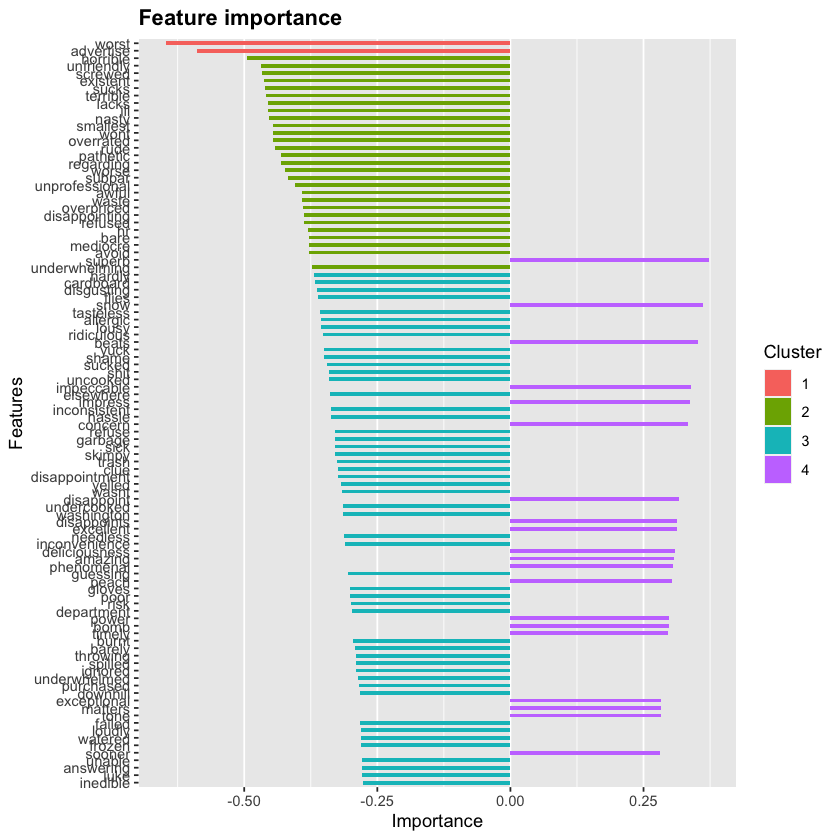

In [9]:

gb <- xgboost(Data, ##linear model
              label = y[,1], 
              booster="gblinear",
              nround=200,
              eval_metric = "rmse",
              
)
importance_matrix1 <- xgb.importance(variables, model =gb)
xgb.ggplot.importance(importance_matrix1,top_n=100)



In [10]:
importance_matrix1

Feature,Weight,Importance
<chr>,<dbl>,<dbl>
worst,-0.647437,-0.647437
advertise,-0.588695,-0.588695
horrible,-0.494203,-0.494203
unfriendly,-0.468956,-0.468956
screwed,-0.466549,-0.466549
existent,-0.461994,-0.461994
sucks,-0.460110,-0.460110
terrible,-0.459854,-0.459854
lacks,-0.456093,-0.456093


[11:17:03] WARNING: amalgamation/../src/learner.cc:516: 
Parameters: { maxdepth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[1]	train-rmse:2.868622 
[2]	train-rmse:2.401069 
[3]	train-rmse:2.041796 
[4]	train-rmse:1.765367 
[5]	train-rmse:1.561237 
[6]	train-rmse:1.405484 
[7]	train-rmse:1.293502 
[8]	train-rmse:1.210683 
[9]	train-rmse:1.147814 
[10]	train-rmse:1.101459 
[11]	train-rmse:1.069053 
[12]	train-rmse:1.043631 
[13]	train-rmse:1.022921 
[14]	train-rmse:1.005761 
[15]	train-rmse:0.989564 
[16]	train-rmse:0.978577 
[17]	train-rmse:0.968839 
[18]	train-rmse:0.959356 
[19]	train-rmse:0.950873 
[20]	train-rmse:0.944367 
[21]	train-rmse:0.938324 
[22]	train-rmse:0.931524 
[23]	train-rmse:0.925601 
[24]	train-rmse:0.919807 
[25]	train-rmse:0.914403 
[26]	train-rmse:0.

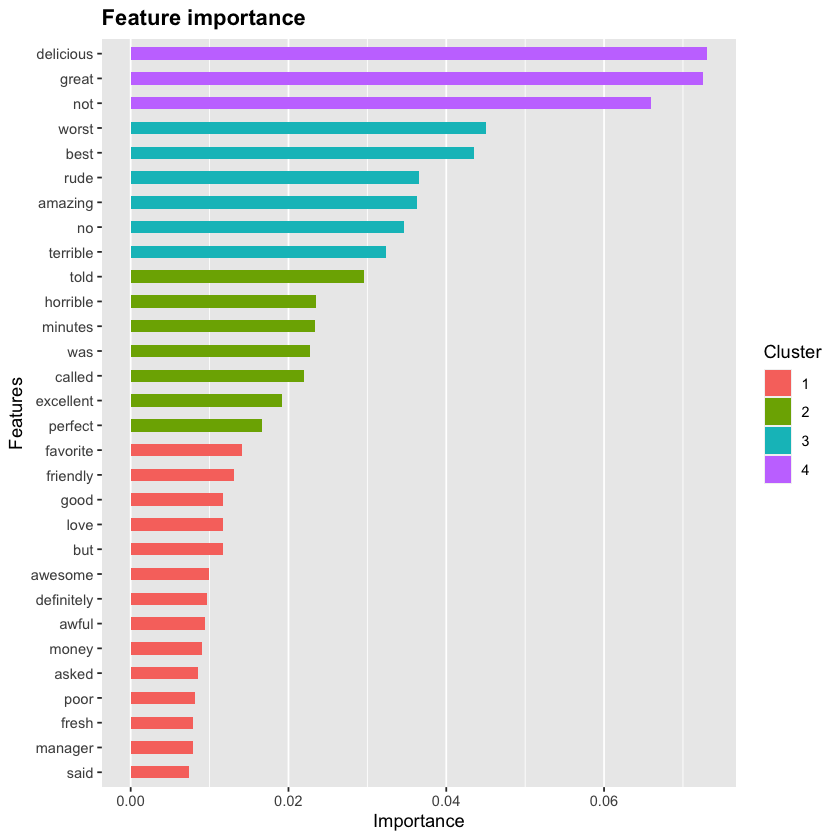

In [11]:

gb_tree2 <- xgboost(Data,
              label = y[,1], 
              booster="gbtree",
              nround=50,
              eval_metric = "rmse",
              eta=0.2,
              maxdepth=10
              
)

importance_matrix2 <- xgb.importance(variables, model =gb_tree2)
xgb.ggplot.importance(importance_matrix2,top_n=30)

In [12]:
importance_matrix2

Feature,Gain,Cover,Frequency,Importance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
delicious,0.073102590,0.016624888,0.023029867,0.073102590
great,0.072574941,0.023944914,0.023749550,0.072574941
not,0.065983980,0.018928120,0.014753508,0.065983980
worst,0.045019513,0.013206229,0.006836992,0.045019513
best,0.043577771,0.014173082,0.010075567,0.043577771
rude,0.036553314,0.011760044,0.005397625,0.036553314
amazing,0.036304643,0.013603206,0.009355883,0.036304643
no,0.034659565,0.006875841,0.004677942,0.034659565
terrible,0.032316414,0.013081978,0.005037783,0.032316414


[11:31:08] WARNING: amalgamation/../src/learner.cc:516: 
Parameters: { maxdepth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[1]	train-rmse:2.868622 
[2]	train-rmse:2.401069 
[3]	train-rmse:2.041796 
[4]	train-rmse:1.765367 
[5]	train-rmse:1.561237 
[6]	train-rmse:1.405484 
[7]	train-rmse:1.293502 
[8]	train-rmse:1.210683 
[9]	train-rmse:1.147814 
[10]	train-rmse:1.101459 
[11]	train-rmse:1.069053 
[12]	train-rmse:1.043631 
[13]	train-rmse:1.022921 
[14]	train-rmse:1.005761 
[15]	train-rmse:0.989564 
[16]	train-rmse:0.978577 
[17]	train-rmse:0.968839 
[18]	train-rmse:0.959356 
[19]	train-rmse:0.950873 
[20]	train-rmse:0.944367 
[21]	train-rmse:0.938324 
[22]	train-rmse:0.931524 
[23]	train-rmse:0.925601 
[24]	train-rmse:0.919807 
[25]	train-rmse:0.914403 
[26]	train-rmse:0.

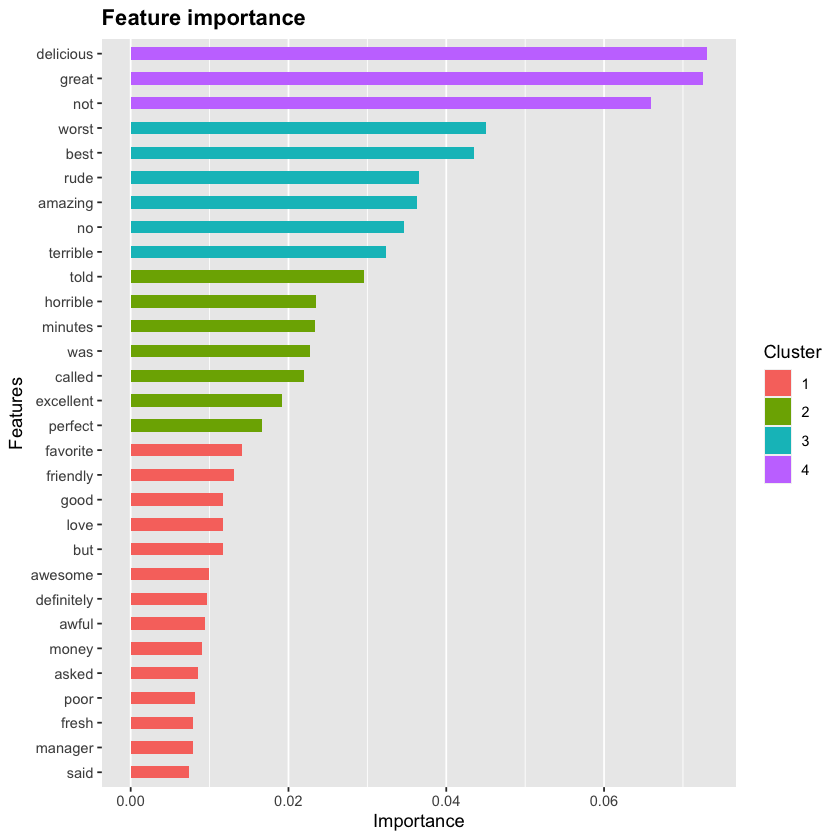

In [13]:

gb_tree3 <- xgboost(Data,
              label = y[,1], 
              booster="gbtree",
              nround=50,
              eval_metric = "rmse",
              eta=0.2,
              maxdepth=100
              
)

importance_matrix3 <- xgb.importance(variables, model =gb_tree3)
xgb.ggplot.importance(importance_matrix3,top_n=30)

In [14]:
importance_matrix3

Feature,Gain,Cover,Frequency,Importance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
delicious,0.073102590,0.016624888,0.023029867,0.073102590
great,0.072574941,0.023944914,0.023749550,0.072574941
not,0.065983980,0.018928120,0.014753508,0.065983980
worst,0.045019513,0.013206229,0.006836992,0.045019513
best,0.043577771,0.014173082,0.010075567,0.043577771
rude,0.036553314,0.011760044,0.005397625,0.036553314
amazing,0.036304643,0.013603206,0.009355883,0.036304643
no,0.034659565,0.006875841,0.004677942,0.034659565
terrible,0.032316414,0.013081978,0.005037783,0.032316414


In [15]:
write.csv(importance_matrix1,"data/Importance_matrix1.csv")
write.csv(importance_matrix2,"data/Importance_matrix2.csv")
write.csv(importance_matrix3,"data/Importance_matrix3.csv")

The word list above is important word linked with star rating by three method above, it seems that the results of tree method has no connection with depth. 